In [1]:
import pandas as pd
import numpy as np
import os
    
import missingno as msno
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set()
import folium
import math
import warnings

from datetime import datetime
import datetime
from matplotlib import pyplot as plt
from scipy.stats import uniform
from textwrap import wrap
from math import sqrt

from sklearn.base import TransformerMixin, BaseEstimator, clone
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_regression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,  median_absolute_error, mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, LabelEncoder
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC
from sklearn import dummy, preprocessing, utils


import xgboost as xg
import shap



In [2]:
df= pd.read_csv('df_pour_explo.csv')
df2= pd.read_csv('df_encoder_pour_explo.csv')

dfNRJ= pd.read_csv('df_pour_explo.csv')
dfNRJ2= pd.read_csv('df_encoder_pour_explo.csv')



In [3]:
df

,PrimaryPropertyType,LargestPropertyUseType,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,...,ENERGYSTARScore,age_building,part_park,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),PropertyGFABuilding(s),GHGEmissionsIntensity
0,Hotel,Hotel,88434,1.0,12,7.456910e+06,249.98,1,0.546060,1,...,60.0,89,0.000000,81.699997,84.300003,182.500000,189.000000,7.226362e+06,88434,2.83
1,Hotel,Hotel,103566,1.0,11,8.664479e+06,295.86,1,0.386609,0,...,61.0,20,14.545314,94.800003,97.900002,176.100006,179.399994,8.387933e+06,88502,2.86
2,Hotel,Hotel,956110,1.0,41,7.393711e+07,2089.28,1,0.682307,1,...,43.0,47,20.574829,96.000000,97.699997,241.899994,244.100006,7.258702e+07,759392,2.19
3,Hotel,Hotel,61320,1.0,10,6.946800e+06,286.43,1,0.407519,1,...,56.0,90,0.000000,110.800003,113.300003,216.199997,224.000000,6.794584e+06,61320,4.67
4,Hotel,Hotel,175580,1.0,18,1.465650e+07,505.01,1,0.378802,0,...,75.0,36,35.311539,114.800003,118.699997,211.399994,215.600006,1.417261e+07,113580,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,Other,Culture,18261,1.0,1,1.025432e+06,20.33,1,0.678440,0,...,NaN,34,0.000000,51.000000,56.200001,126.000000,136.600006,9.320821e+05,18261,1.11
1510,Other,Culture,16000,1.0,1,1.053706e+06,32.17,1,0.417296,0,...,NaN,12,0.000000,59.400002,65.900002,114.199997,118.900002,9.502762e+05,16000,2.01
1511,Other,Culture,13157,1.0,1,6.053764e+06,223.54,1,0.310820,0,...,NaN,42,0.000000,438.200012,460.100006,744.799988,767.799988,5.765898e+06,13157,16.99
1512,Other,Culture,14101,1.0,1,7.828413e+05,22.11,1,0.484898,0,...,NaN,27,0.000000,51.000000,55.500000,105.300003,110.800003,7.194712e+05,14101,1.57


In [4]:
df=df.drop(["ENERGYSTARScore"], axis=1)


In [5]:
df=df.dropna(axis=0,how="any")

In [6]:
df.head()

,PrimaryPropertyType,LargestPropertyUseType,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,...,NaturalGas_Part,age_building,part_park,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),PropertyGFABuilding(s),GHGEmissionsIntensity
0,Hotel,Hotel,88434,1.0,12,7456910.0,249.98,1,0.546060,1,...,0.176638,89,0.000000,81.699997,84.300003,182.500000,189.000000,7226362.5,88434,2.83
1,Hotel,Hotel,103566,1.0,11,8664479.0,295.86,1,0.386609,0,...,0.613391,20,14.545314,94.800003,97.900002,176.100006,179.399994,8387933.0,88502,2.86
2,Hotel,Hotel,956110,1.0,41,73937112.0,2089.28,1,0.682307,1,...,0.020579,47,20.574829,96.000000,97.699997,241.899994,244.100006,72587024.0,759392,2.19
3,Hotel,Hotel,61320,1.0,10,6946800.5,286.43,1,0.407519,1,...,0.266567,90,0.000000,110.800003,113.300003,216.199997,224.000000,6794584.0,61320,4.67
4,Hotel,Hotel,175580,1.0,18,14656503.0,505.01,1,0.378802,0,...,0.621198,36,35.311539,114.800003,118.699997,211.399994,215.600006,14172606.0,113580,2.88


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1513
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1509 non-null   object 
 1   LargestPropertyUseType  1509 non-null   object 
 2   PropertyGFATotal        1509 non-null   int64  
 3   NumberofBuildings       1509 non-null   float64
 4   NumberofFloors          1509 non-null   int64  
 5   SiteEnergyUseWN(kBtu)   1509 non-null   float64
 6   TotalGHGEmissions       1509 non-null   float64
 7   Electricity_Use         1509 non-null   int64  
 8   Electricity_Part        1509 non-null   float64
 9   SteamUse_Use            1509 non-null   int64  
 10  SteamUse_Part           1509 non-null   float64
 11  NaturalGas_Use          1509 non-null   int64  
 12  NaturalGas_Part         1509 non-null   float64
 13  age_building            1509 non-null   int64  
 14  part_park               1509 non-null   

In [8]:
df2= df2.drop(["ENERGYSTARScore"], axis=1)
df2

,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,SteamUse_Part,NaturalGas_Use,...,LargestPropertyUseType_Distribution,LargestPropertyUseType_Food,LargestPropertyUseType_Hotel,LargestPropertyUseType_Legal,LargestPropertyUseType_Medical,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_School,LargestPropertyUseType_Sport
0,88434,1.0,12,7.456910e+06,249.98,1,0.546060,1,0.277302,1,...,0,0,1,0,0,0,0,0,0,0
1,103566,1.0,11,8.664479e+06,295.86,1,0.386609,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
2,956110,1.0,41,7.393711e+07,2089.28,1,0.682307,1,0.297113,1,...,0,0,1,0,0,0,0,0,0,0
3,61320,1.0,10,6.946800e+06,286.43,1,0.407519,1,0.325913,1,...,0,0,1,0,0,0,0,0,0,0
4,175580,1.0,18,1.465650e+07,505.01,1,0.378802,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,18261,1.0,1,1.025432e+06,20.33,1,0.678440,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1510,16000,1.0,1,1.053706e+06,32.17,1,0.417296,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1511,13157,1.0,1,6.053764e+06,223.54,1,0.310820,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1512,14101,1.0,1,7.828413e+05,22.11,1,0.484898,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2=df2.dropna(axis=0,how="any")

In [10]:
df2.head()

,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,SteamUse_Part,NaturalGas_Use,...,LargestPropertyUseType_Distribution,LargestPropertyUseType_Food,LargestPropertyUseType_Hotel,LargestPropertyUseType_Legal,LargestPropertyUseType_Medical,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_School,LargestPropertyUseType_Sport
0,88434,1.0,12,7456910.0,249.98,1,0.546060,1,0.277302,1,...,0,0,1,0,0,0,0,0,0,0
1,103566,1.0,11,8664479.0,295.86,1,0.386609,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
2,956110,1.0,41,73937112.0,2089.28,1,0.682307,1,0.297113,1,...,0,0,1,0,0,0,0,0,0,0
3,61320,1.0,10,6946800.5,286.43,1,0.407519,1,0.325913,1,...,0,0,1,0,0,0,0,0,0,0
4,175580,1.0,18,14656503.0,505.01,1,0.378802,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1513
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PropertyGFATotal                     1513 non-null   int64  
 1   NumberofBuildings                    1513 non-null   float64
 2   NumberofFloors                       1513 non-null   int64  
 3   SiteEnergyUseWN(kBtu)                1513 non-null   float64
 4   TotalGHGEmissions                    1513 non-null   float64
 5   Electricity_Use                      1513 non-null   int64  
 6   Electricity_Part                     1513 non-null   float64
 7   SteamUse_Use                         1513 non-null   int64  
 8   SteamUse_Part                        1513 non-null   float64
 9   NaturalGas_Use                       1513 non-null   int64  
 10  NaturalGas_Part                      1513 non-null   float64
 11  age_building                  

### PREPARATION DES VARIABLES

In [12]:
X = df2[['NumberofBuildings', 'NumberofFloors', 
       'age_building', 'part_park', 'Electricity_Use' , 'SteamUse_Use', 'NaturalGas_Use',
         'PropertyGFABuilding(s)','PropertyGFATotal',
        'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Medical', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other', 'PrimaryPropertyType_School',
        'LargestPropertyUseType_Culture', 'LargestPropertyUseType_Distribution',   'LargestPropertyUseType_Food', 'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_Legal', 'LargestPropertyUseType_Medical', 'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other', 'LargestPropertyUseType_Parking', 'LargestPropertyUseType_School', 'LargestPropertyUseType_Sport']]

y = df2[['SiteEnergyUseWN(kBtu)']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
std_scale = StandardScaler().fit(X_train)
X_train_std =  std_scale.transform(X_train)
X_test_std =  std_scale.transform(X_test)

In [14]:
CV = KFold(n_splits = 5, shuffle = True, random_state = 100)


scoring = {'R2': 'r2',
           'MAE': 'neg_mean_squared_error',
           'RMSE': 'neg_mean_absolute_error'}

### DUMMY REGRESSOR

In [15]:

Dummyparams = [{'n_features_to_select': list(range(1, 5))}]

lm = LinearRegression()
lm.fit(X_train_std, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()

MyDummy = GridSearchCV(estimator = rfe, 
                        param_grid = Dummyparams, 
                        scoring= scoring,
                        refit= False,  
                        cv = CV, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
MyDummy.fit(X_train_std, y_train)  

MyDummy.cv_results_



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................n_features_to_select=1; total time=   0.0s
[CV] END .............................n_features_to_select=1; total time=   0.0s
[CV] END .............................n_features_to_select=1; total time=   0.0s
[CV] END .............................n_features_to_select=1; total time=   0.0s
[CV] END .............................n_features_to_select=1; total time=   0.0s
[CV] END .............................n_features_to_select=2; total time=   0.0s
[CV] END .............................n_features_to_select=2; total time=   0.0s
[CV] END .............................n_features_to_select=2; total time=   0.0s
[CV] END .............................n_features_to_select=2; total time=   0.0s
[CV] END .............................n_features_to_select=2; total time=   0.0s
[CV] END .............................n_features_to_select=3; total time=   0.0s
[CV] END .............................n_features_

{'mean_fit_time': array([0.01571207, 0.01470189, 0.00794373, 0.01205788]),
 'std_fit_time': array([0.00023629, 0.00184944, 0.00660055, 0.00705828]),
 'mean_score_time': array([0.        , 0.        , 0.00725937, 0.00376406]),
 'std_score_time': array([0.        , 0.        , 0.00690074, 0.00630181]),
 'param_n_features_to_select': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_features_to_select': 1},
  {'n_features_to_select': 2},
  {'n_features_to_select': 3},
  {'n_features_to_select': 4}],
 'split0_test_R2': array([0.26210998, 0.18810145, 0.19054217, 0.19372901]),
 'split1_test_R2': array([0.27423317, 0.23832515, 0.22636013, 0.14833163]),
 'split2_test_R2': array([0.43169227, 0.4405816 , 0.45335191, 0.54959666]),
 'split3_test_R2': array([0.54846499, 0.02566095, 0.003256  , 0.06692631]),
 'split4_test_R2': array([0.63823182, 0.74758494, 0.74984362, 0.78331937]),
 'mean_test_R2': ar

In [16]:
MyDummybest=pd.concat([pd.DataFrame(MyDummy.cv_results_)])
MyDummybest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_train_RMSE,split1_train_RMSE,split2_train_RMSE,split3_train_RMSE,split4_train_RMSE,mean_train_RMSE,std_train_RMSE
0,0.015712,0.000236,0.000000,0.000000,1,{'n_features_to_select': 1},0.262110,0.274233,0.431692,0.548465,...,-4.900685e+06,697670.853824,1,-4.900579e+06,-5.029418e+06,-4.529795e+06,-5.211849e+06,-4.624344e+06,-4.859197e+06,252472.671114
1,0.014702,0.001849,0.000000,0.000000,2,{'n_features_to_select': 2},0.188101,0.238325,0.440582,0.025661,...,-5.273352e+06,399825.127077,2,-5.244910e+06,-5.208297e+06,-4.599798e+06,-5.449045e+06,-4.987837e+06,-5.097978e+06,288901.921539
2,0.007944,0.006601,0.007259,0.006901,3,{'n_features_to_select': 3},0.190542,0.226360,0.453352,0.003256,...,-5.297270e+06,397477.967918,3,-5.222634e+06,-5.294138e+06,-4.594514e+06,-5.537329e+06,-5.028377e+06,-5.135398e+06,315710.805212
3,0.012058,0.007058,0.003764,0.006302,4,{'n_features_to_select': 4},0.193729,0.148332,0.549597,0.066926,...,-5.327294e+06,495501.066695,4,-5.240123e+06,-5.231638e+06,-4.672051e+06,-5.493781e+06,-5.054434e+06,-5.138405e+06,271981.054024


In [17]:
MyDummybestR2=MyDummybest[MyDummybest['rank_test_R2'].isin([1])]
print(MyDummybestR2['mean_test_R2'])

0    0.430946
Name: mean_test_R2, dtype: float64


###  ELASTICNET

In [18]:
Elastparams = {"tol" : [0.1,0.01,0.001,0.0001],
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
          "l1_ratio": np.arange(0.0, 1.0, 0.1)}


MyElastic = GridSearchCV(estimator = ElasticNet(), 
                      param_grid = Elastparams,
                      scoring = scoring,
                      refit= False,      
                      cv=CV,
                      verbose=2
                     )

MyElastic.fit(X_train_std, y_train)
MyElastic.cv_results_

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
[CV] END ................alpha=0.0001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.0, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.014e+16, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.573e+16, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.239e+16, tolerance: 2.899e+16 Linear regression models with null weig

[CV] END ..............alpha=0.0001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.0, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.573e+16, tolerance: 4.493e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.239e+16, tolerance: 2.899e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.658e+16, tolerance: 4.557e+14 Linear regression models with null weig

[CV] END ................alpha=0.0001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.1, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.945e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.566e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.221e+16, tolerance: 2.899e+15
Objective did n

[CV] END ..............alpha=0.0001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.2, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.945e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.566e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.221e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+16, tolerance: 4.557e+13
Objective did n

[CV] END ................alpha=0.0001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.2, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.560e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.205e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.649e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.879e+16, tolerance: 3.849e+14
Objective did n

[CV] END .............alpha=0.0001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.817e+16, tolerance: 3.849e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.554e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.188e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+16, tolerance: 4.557e+16
Objective did n

[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.817e+16, tolerance: 3.849e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.554e+16, tolerance: 4.493e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.188e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.645e+16, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.375e+16, tolerance: 3.400e+14
Objective did n

[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.4, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.173e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.641e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.758e+16, tolerance: 3.849e+15
Objective did n

[CV] END ..............alpha=0.0001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.5, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.173e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.641e+16, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.758e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.548e+16, tolerance: 4.493e+13
Objective did n

[CV] END ................alpha=0.0001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.5, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.637e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.703e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.542e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.158e+16, tolerance: 2.899e+15
Objective did n

[CV] END ..............alpha=0.0001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.537e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.144e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.650e+16, tolerance: 3.849e+14
Objective did n

[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.601e+16, tolerance: 3.849e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.532e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.130e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.630e+16, tolerance: 4.557e+16
Objective did n

[CV] END alpha=0.0001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.532e+16, tolerance: 4.493e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.130e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.630e+16, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.601e+16, tolerance: 3.849e+13
Objective did n

[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.0001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.8, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.626e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.554e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.527e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.117e+16, tolerance: 2.899e+15
Objective did n

[CV] END ................alpha=0.0001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.8, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.554e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.527e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.117e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.626e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.373e+16, tolerance: 3.400e+13
Objective did n

[CV] END .............alpha=0.0001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.0001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.9, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.105e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.623e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.372e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.510e+16, tolerance: 3.849e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+16, tolerance: 4.493e+14
Objective did n

[CV] END ...............alpha=0.0001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.0001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.0001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END .............alpha=0.0001, l1_ratio=0.9, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.372e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.037e+16, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.613e+16, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might w

[CV] END .............alpha=0.0001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.0, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.613e+16, tolerance: 4.493e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+16, tolerance: 2.899e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.695e+16, tolerance: 4.557e+14 Linear regression models with null weig

[CV] END ...............alpha=0.001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.1, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.399e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.579e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.297e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.423e+16, tolerance: 2.899e+15
Objective did n

[CV] END .................alpha=0.001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.1, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.579e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.297e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.423e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.471e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.399e+16, tolerance: 3.400e+13
Objective did n

[CV] END ..............alpha=0.001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.2, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.105e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.975e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.335e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.396e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.725e+16, tolerance: 3.849e+14
Objective did n

[CV] END ................alpha=0.001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.2, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.2, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.2, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.335e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.396e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.744e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+16, tolerance: 4.557e+16
Objective did n

[CV] END ..............alpha=0.001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.2, tol=0.0001; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.30000000000000004, tol=0.1; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+16, tolerance: 3.849e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+16, tolerance: 4.493e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.744e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+16, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.392e+16, tolerance: 3.400e+14
Objective did n

[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.30000000000000004, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.4, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.642e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.220e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.389e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.941e+16, tolerance: 4.493e+15
Objective did n

[CV] END .................alpha=0.001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.4, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.4, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.4, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.389e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.941e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.642e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.220e+16, tolerance: 4.557e+13
Objective did n

[CV] END ...............alpha=0.001, l1_ratio=0.4, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.4, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.5, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.5, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.925e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.620e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.210e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.386e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+16, tolerance: 3.849e+14
Objective did n

[CV] END ................alpha=0.001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.5, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.5, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.5, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.210e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.386e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.934e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.651e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e+16, tolerance: 4.557e+16
Objective did n

[CV] END ..............alpha=0.001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.5, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.383e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.205e+16, tolerance: 3.849e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.934e+16, tolerance: 4.493e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.651e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.218e+16, tolerance: 4.557e+14
Objective did n

[CV] END .alpha=0.001, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001,

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.717e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.237e+16, tolerance: 4.557e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.380e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+16, tolerance: 3.849e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.959e+16, tolerance: 4.493e+15
Objective did n

[CV] END ..alpha=0.001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.001, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.001, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.380e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.959e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.717e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.237e+16, tolerance: 4.557e+13
Objective did n

[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.001, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.8, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.995e+16, tolerance: 4.493e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.804e+16, tolerance: 2.899e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.263e+16, tolerance: 4.557e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.377e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.406e+16, tolerance: 3.849e+14
Objective did n

[CV] END ................alpha=0.001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.8, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.263e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.377e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+16, tolerance: 4.493e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.905e+16, tolerance: 2.899e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.293e+16, tolerance: 4.557e+16
Objective did n

[CV] END ..............alpha=0.001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.001, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.001, l1_ratio=0.9, tol=0.01; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+16, tolerance: 3.849e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+16, tolerance: 4.493e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.905e+16, tolerance: 2.899e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.293e+16, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.374e+16, tolerance: 3.400e+14
Objective did n

[CV] END ...............alpha=0.001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.001, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ..............alpha=0.001, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.0, tol=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.471e+16, tolerance: 2.899e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.911e+16, tolerance: 4.557e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.547e+16, tolerance: 3.400e+16 Linear regression models with null weig

[CV] END ..................alpha=0.01, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.0, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.547e+16, tolerance: 3.400e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.177e+16, tolerance: 3.849e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.827e+16, tolerance: 4.493e+13 Linear regression models with null weig

[CV] END ................alpha=0.01, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END .................al

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+14, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+15, tolerance: 3.400e+15


[CV] END ..alpha=0.01, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_rati

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+15, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.234e+15, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+16, tolerance: 3.400e+16


[CV] END alpha=0.01, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END ...alpha=0.01, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.01, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.01, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.01, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.01, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.01, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .alpha=0.01, l1_rat

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+16, tolerance: 3.400e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.177e+16, tolerance: 3.400e+13


[CV] END .alpha=0.01, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END .alpha=0.01, l1_ratio=0.7000000000000001, tol=0.001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END alpha=0.01, l1_ratio=0.7000000000000001, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ..................a

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e+16, tolerance: 3.400e+15
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+14, tolerance: 4.557e+14
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e+16, tolerance: 3.400e+14


[CV] END ...............alpha=0.01, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.01, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END .................al

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.828e+14, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.728e+14, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.269e+16, tolerance: 3.400e+16
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.220e+15, tolerance: 4.493e+15
Objective did n

[CV] END .................alpha=0.01, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.01, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.01, l1_ratio=0.9, tol=0.001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.9, tol=0.0001; total time=   0.0s
[CV] END ...............alpha=0.01, l1_ratio=0.9, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.784e+16, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.486e+16, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+16, tolerance: 2.899e+16 Linear regression models with null weig

[CV] END ...................alpha=0.1, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.0, tol=0.1; total time=   0.0s
[CV] END ..................alpha=0.1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=0.1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=0.1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=0.1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=0.1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=0.1, l1_ratio=0.0, tol=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.486e+16, tolerance: 4.493e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+16, tolerance: 2.899e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.601e+16, tolerance: 4.557e+14 Linear regression models with null weig

[CV] END .................alpha=0.1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=0.1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=0.1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=0.1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ................alpha=0.1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=0.1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=0.1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................

[CV] END ....alpha=0.1, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.1, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ....alpha=0.1, l1_ratio=0.6000000000000001, tol=0.1; total time=   0.0s
[CV] END ...alpha=0.1, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.1, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.1, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.1, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ...alpha=0.1, l1_ratio=0.6000000000000001, tol=0.01; total time=   0.0s
[CV] END ..alpha=0.1, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.1, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.1, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.1, l1_ratio=0.6000000000000001, tol=0.001; total time=   0.0s
[CV] END ..alpha=0.1, l1_rat

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+17, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+17, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.961e+16, tolerance: 2.899e+16 Linear regression models with null weig

[CV] END ....................alpha=1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ...................alpha=1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...................alpha=1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...................alpha=1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...................alpha=1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ...................alpha=1, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..................alpha=1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=1, l1_ratio=0.0, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+17, tolerance: 4.493e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.961e+16, tolerance: 2.899e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+17, tolerance: 4.557e+14 Linear regression models with null weig

[CV] END ..................alpha=1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ..................alpha=1, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .....................alpha=1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .....................alpha=1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .....................alpha=1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .....................alpha=1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END .....................alpha=1, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ....................alpha=1, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ...................

[CV] END ...alpha=1, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END ...alpha=1, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END ...alpha=1, l1_ratio=0.6000000000000001, tol=0.0001; total time=   0.0s
[CV] END ......alpha=1, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ......alpha=1, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ......alpha=1, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ......alpha=1, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END ......alpha=1, l1_ratio=0.7000000000000001, tol=0.1; total time=   0.0s
[CV] END .....alpha=1, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .....alpha=1, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .....alpha=1, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .....alpha=1, l1_ratio=0.7000000000000001, tol=0.01; total time=   0.0s
[CV] END .....alpha=1, l1_ra

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+17, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.964e+17, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+17, tolerance: 2.899e+16 Linear regression models with null weig

[CV] END ..................alpha=10, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.989e+17, tolerance: 4.557e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+17, tolerance: 3.400e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.655e+17, tolerance: 3.849e+13 Linear regression models with null weig

[CV] END ..................alpha=10, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END ..................alpha=10, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.1, tol=0.0001; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.2, tol=0.1; total time=   0.0s
[CV] END ...................

[CV] END ..................alpha=10, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END .................alpha=10, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ....................alpha=10, l1_ratio=0.9, tol=0.1; total time=   0.0s
[CV] END ...................alpha=10, l1_ratio=0.9, tol=0.01; total time=   0.0s
[CV] END ...................

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+17, tolerance: 3.849e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+17, tolerance: 4.493e+16 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+17, tolerance: 2.899e+16 Linear regression models with null weig

[CV] END ..................alpha=100, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.0, tol=0.01; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.0, tol=0.001; total time=   0.0s
[CV] END ................alpha=100, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=100, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=100, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ................alpha=100, l1_ratio=0.0, tol=0.0001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+17, tolerance: 2.899e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+17, tolerance: 4.557e+14 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+17, tolerance: 3.400e+14 Linear regression models with null weig

[CV] END ................alpha=100, l1_ratio=0.0, tol=0.0001; total time=   0.0s
[CV] END ...................alpha=100, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=100, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=100, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=100, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ...................alpha=100, l1_ratio=0.1, tol=0.1; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.1, tol=0.01; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.1, tol=0.001; total time=   0.0s
[CV] END .................al

[CV] END ...................alpha=100, l1_ratio=0.8, tol=0.1; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END ..................alpha=100, l1_ratio=0.8, tol=0.01; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END .................alpha=100, l1_ratio=0.8, tol=0.001; total time=   0.0s
[CV] END ................alpha=100, l1_ratio=0.8, tol=0.0001; total time=   0.0s
[CV] END ................alp

{'mean_fit_time': array([0.01882806, 0.01895161, 0.01639872, 0.01561441, 0.01729527,
        0.01700606, 0.01658602, 0.01601601, 0.015973  , 0.01722898,
        0.01696901, 0.01512856, 0.01690021, 0.01552062, 0.0186532 ,
        0.01305747, 0.01970601, 0.01441693, 0.01750212, 0.01486573,
        0.01313219, 0.01520581, 0.01666708, 0.01598477, 0.01540151,
        0.01999288, 0.01571088, 0.01390147, 0.01467009, 0.01966372,
        0.01785946, 0.01069369, 0.01697202, 0.01642914, 0.01335144,
        0.01543665, 0.01280527, 0.0174758 , 0.01823287, 0.01643806,
        0.01557512, 0.01600032, 0.01831264, 0.01626563, 0.01582122,
        0.01589522, 0.01571651, 0.01712499, 0.01372418, 0.01669855,
        0.01519861, 0.01352921, 0.01475706, 0.01643014, 0.01677303,
        0.01570692, 0.01425166, 0.01578336, 0.01570921, 0.01381917,
        0.01684155, 0.018119  , 0.01892562, 0.01425796, 0.01569571,
        0.01675863, 0.01632109, 0.0157052 , 0.01951294, 0.01391053,
        0.0171761 , 0.014814  ,

In [19]:
MyElasticbest=pd.concat([pd.DataFrame(MyElastic.cv_results_)])
MyElasticbest


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_tol,params,split0_test_R2,split1_test_R2,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.018828,0.003435,0.000199,0.000399,0.0001,0.0,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.0, 'tol': 0.1}",0.196262,0.218800,...,1.162935e+14,21,-5.779317e+06,-6.265009e+06,-6.300497e+06,-5.365622e+06,-5.322976e+06,-5.806684e+06,4.202788e+05,173
1,0.018952,0.003853,0.002226,0.000438,0.0001,0.0,0.01,"{'alpha': 0.0001, 'l1_ratio': 0.0, 'tol': 0.01}",0.196262,0.218800,...,1.162935e+14,21,-5.779317e+06,-6.265009e+06,-6.300497e+06,-5.365622e+06,-5.322976e+06,-5.806684e+06,4.202788e+05,173
2,0.016399,0.003227,0.001703,0.000874,0.0001,0.0,0.001,"{'alpha': 0.0001, 'l1_ratio': 0.0, 'tol': 0.001}",0.196262,0.218800,...,1.162935e+14,21,-5.779317e+06,-6.265009e+06,-6.300497e+06,-5.365622e+06,-5.322976e+06,-5.806684e+06,4.202788e+05,173
3,0.015614,0.000044,0.000000,0.000000,0.0001,0.0,0.0001,"{'alpha': 0.0001, 'l1_ratio': 0.0, 'tol': 0.0001}",0.196262,0.218800,...,1.162935e+14,21,-5.779317e+06,-6.265009e+06,-6.300497e+06,-5.365622e+06,-5.322976e+06,-5.806684e+06,4.202788e+05,173
4,0.017295,0.005201,0.001152,0.000945,0.0001,0.1,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1, 'tol': 0.1}",0.196291,0.218706,...,1.162885e+14,25,-5.779532e+06,-6.265564e+06,-6.301043e+06,-5.365977e+06,-5.323514e+06,-5.807126e+06,4.203272e+05,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.000000,0.000000,0.000000,0.000000,100,0.8,0.0001,"{'alpha': 100, 'l1_ratio': 0.8, 'tol': 0.0001}",0.073609,0.184636,...,2.600245e+14,245,-7.388088e+06,-6.763707e+06,-8.592824e+06,-6.217323e+06,-8.987550e+06,-7.589898e+06,1.055137e+06,245
276,0.003126,0.006253,0.000101,0.000201,100,0.9,0.1,"{'alpha': 100, 'l1_ratio': 0.9, 'tol': 0.1}",0.120889,0.296065,...,2.437526e+14,241,-6.783163e+06,-6.258622e+06,-7.998972e+06,-5.604025e+06,-8.318777e+06,-6.992712e+06,1.027839e+06,241
277,0.000000,0.000000,0.003103,0.006205,100,0.9,0.01,"{'alpha': 100, 'l1_ratio': 0.9, 'tol': 0.01}",0.120889,0.296065,...,2.437526e+14,241,-6.783163e+06,-6.258622e+06,-7.998972e+06,-5.604025e+06,-8.318777e+06,-6.992712e+06,1.027839e+06,241
278,0.000000,0.000000,0.003128,0.006255,100,0.9,0.001,"{'alpha': 100, 'l1_ratio': 0.9, 'tol': 0.001}",0.120889,0.296064,...,2.437526e+14,243,-6.783167e+06,-6.258625e+06,-7.998975e+06,-5.604028e+06,-8.318780e+06,-6.992715e+06,1.027838e+06,243


In [20]:
MyElasticbestR2=MyElasticbest[MyElasticbest['rank_test_R2'].isin([1])]
print(MyElasticbestR2['mean_test_R2'])

236    0.433164
Name: mean_test_R2, dtype: float64


### RIDGE

In [21]:
Ridgeparams = {
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
          }


MyRidge = GridSearchCV(estimator = Ridge(), 
                      param_grid = Ridgeparams,
                      scoring = scoring,
                      refit= False,      
                      cv=CV,
                      verbose=2
                     )

MyRidge.fit(X_train_std, y_train)
MyRidge.cv_results_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................

{'mean_fit_time': array([0.00313478, 0.        , 0.00312543, 0.        , 0.0031251 ,
        0.        , 0.        ]),
 'std_fit_time': array([0.00626955, 0.        , 0.00625086, 0.        , 0.00625019,
        0.        , 0.        ]),
 'mean_score_time': array([0.00320311, 0.00312629, 0.        , 0.00312486, 0.        ,
        0.00312524, 0.0031251 ]),
 'std_score_time': array([0.0046677 , 0.00625257, 0.        , 0.00624971, 0.        ,
        0.00625048, 0.00625019]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_R2': array([0.19655073, 0.19654784, 0.19651896, 0.19623284, 0.19361492,
        0.18088873, 0.18598827]),
 'split1_test_R2': array([0.21783409, 0.21784397, 0.2179424 , 0.21

In [22]:
MyRidgebest=pd.concat([pd.DataFrame(MyRidge.cv_results_)])
MyRidgebest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.003135,0.006270,0.003203,0.004668,0.0001,{'alpha': 0.0001},0.196551,0.217834,0.573968,0.011476,...,1.162423e+14,4,-5.781485e+06,-6.270619e+06,-6.306004e+06,-5.369199e+06,-5.328436e+06,-5.811149e+06,420762.865415,7
1,0.000000,0.000000,0.003126,0.006253,0.001,{'alpha': 0.001},0.196548,0.217844,0.573968,0.011481,...,1.162428e+14,3,-5.781463e+06,-6.270563e+06,-6.305949e+06,-5.369163e+06,-5.328381e+06,-5.811104e+06,420757.957945,6
2,0.003125,0.006251,0.000000,0.000000,0.01,{'alpha': 0.01},0.196519,0.217942,0.573969,0.011535,...,1.162480e+14,2,-5.781246e+06,-6.270000e+06,-6.305397e+06,-5.368805e+06,-5.327834e+06,-5.810656e+06,420708.941715,5
3,0.000000,0.000000,0.003125,0.006250,0.1,{'alpha': 0.1},0.196233,0.218896,0.573981,0.012063,...,1.162986e+14,1,-5.779096e+06,-6.264440e+06,-6.299939e+06,-5.365258e+06,-5.322447e+06,-5.806236e+06,420224.607935,4
4,0.003125,0.006250,0.000000,0.000000,1,{'alpha': 1},0.193615,0.225945,0.573967,0.016558,...,1.167120e+14,5,-5.760501e+06,-6.215793e+06,-6.253809e+06,-5.334302e+06,-5.291121e+06,-5.771105e+06,412806.146306,3
5,0.000000,0.000000,0.003125,0.006250,10,{'alpha': 10},0.180889,0.231012,0.570531,0.033938,...,1.182461e+14,6,-5.673996e+06,-6.081646e+06,-6.105261e+06,-5.247459e+06,-5.248892e+06,-5.671451e+06,378095.875842,2
6,0.000000,0.000000,0.003125,0.006250,100,{'alpha': 100},0.185988,0.259103,0.547957,0.118714,...,1.233303e+14,7,-5.436721e+06,-5.940999e+06,-5.986914e+06,-5.063485e+06,-5.106841e+06,-5.506992e+06,395080.875514,1


In [23]:
MyRidgebestR2=MyRidgebest[MyRidgebest['rank_test_R2'].isin([1])]
print(MyRidgebestR2['mean_test_R2'])

6    0.37543
Name: mean_test_R2, dtype: float64


### LASSO

In [24]:
Lassoparams = {
          "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
          }


MyLasso = GridSearchCV(estimator = Lasso(), 
                      param_grid = Lassoparams,
                      scoring = scoring,
                      refit= False,      
                      cv=CV,
                      verbose=2
                     )

MyLasso.fit(X_train_std, y_train)
MyLasso.cv_results_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END .......................................alpha=0.0001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.468e+16, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.517e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.093e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.620e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.372e+16, tolerance: 3.400e+13
Objective did n

[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.753e+15, tolerance: 3.849e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.087e+16, tolerance: 4.493e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+16, tolerance: 2.899e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.045e+16, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.354e+16, tolerance: 3.400e+13
Objective did n

[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ...........................................alpha=10; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ..........................................alpha=100; total time=   0.0s
[CV] END ...................

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e+14, tolerance: 4.557e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.783e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+16, tolerance: 3.400e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.546e+14, tolerance: 3.400e+13


{'mean_fit_time': array([0.0194551 , 0.01582365, 0.01306143, 0.01624374, 0.01642852,
        0.00635095, 0.01250153]),
 'std_fit_time': array([0.00603583, 0.00015389, 0.00502471, 0.00145119, 0.00140632,
        0.00778004, 0.00625333]),
 'mean_score_time': array([0.        , 0.00312533, 0.00581088, 0.00040092, 0.00250087,
        0.00937543, 0.        ]),
 'std_score_time': array([0.        , 0.00625067, 0.0071864 , 0.00080185, 0.00500174,
        0.00765501, 0.        ]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100}],
 'split0_test_R2': array([0.19655105, 0.19655105, 0.19655104, 0.19655103, 0.19655088,
        0.19654936, 0.19653419]),
 'split1_test_R2': array([0.21783301, 0.21783301, 0.21783302, 0.21

In [25]:
MyLassobest=pd.concat([pd.DataFrame(MyLasso.cv_results_)])
MyLassobest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.019455,0.006036,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.196551,0.217833,0.573968,0.011475,...,1.162423e+14,7,-5.781487e+06,-6.270626e+06,-6.306011e+06,-5.369203e+06,-5.328424e+06,-5.811150e+06,420767.560292,7
1,0.015824,0.000154,0.003125,0.006251,0.001,{'alpha': 0.001},0.196551,0.217833,0.573968,0.011475,...,1.162423e+14,6,-5.781487e+06,-6.270626e+06,-6.306011e+06,-5.369203e+06,-5.328424e+06,-5.811150e+06,420767.560540,6
2,0.013061,0.005025,0.005811,0.007186,0.01,{'alpha': 0.01},0.196551,0.217833,0.573968,0.011475,...,1.162423e+14,5,-5.781487e+06,-6.270626e+06,-6.306010e+06,-5.369203e+06,-5.328424e+06,-5.811150e+06,420767.563015,5
3,0.016244,0.001451,0.000401,0.000802,0.1,{'alpha': 0.1},0.196551,0.217833,0.573968,0.011475,...,1.162423e+14,4,-5.781487e+06,-6.270625e+06,-6.306010e+06,-5.369202e+06,-5.328423e+06,-5.811149e+06,420767.587776,4
4,0.016429,0.001406,0.002501,0.005002,1,{'alpha': 1},0.196551,0.217834,0.573968,0.011475,...,1.162424e+14,3,-5.781485e+06,-6.270620e+06,-6.306005e+06,-5.369199e+06,-5.328415e+06,-5.811145e+06,420767.830638,3
5,0.006351,0.007780,0.009375,0.007655,10,{'alpha': 10},0.196549,0.217846,0.573969,0.011478,...,1.162429e+14,2,-5.781468e+06,-6.270568e+06,-6.305956e+06,-5.369166e+06,-5.328337e+06,-5.811099e+06,420770.134526,2
6,0.012502,0.006253,0.000000,0.000000,100,{'alpha': 100},0.196534,0.217959,0.573976,0.011510,...,1.162475e+14,1,-5.781299e+06,-6.270047e+06,-6.305468e+06,-5.368834e+06,-5.327554e+06,-5.810640e+06,420793.329129,1


In [26]:
MyLassobestR2=MyLassobest[MyLassobest['rank_test_R2'].isin([1])]
print(MyLassobestR2['mean_test_R2'])

6    0.360174
Name: mean_test_R2, dtype: float64


### RANDOM FOREST

In [27]:
Randomparams = {
    'n_estimators' : [10,50,100,300,500],
    'min_samples_leaf' : [1,3,5,10], 
    'max_features': ['auto', 'sqrt'] 
}
MyRandom = GridSearchCV(RandomForestRegressor(),
                        param_grid = Randomparams,
                        scoring=scoring,
                        refit=False,
                        verbose=2,
                        cv=CV)

MyRandom.fit(X_train_std, y_train)
MyRandom.cv_results_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=10; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=300; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500; total time=   1.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500; total time=   1.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500; total time=   1.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500; total time=   1.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=1, n_estimators=500; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=10; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=3, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=500; total time=   1.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=500; total time=   1.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=500; total time=   0.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=500; total time=   1.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=3, n_estimators=500; total time=   1.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=10; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=300; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=500; total time=   0.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=500; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=500; total time=   0.8s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=500; total time=   0.9s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=5, n_estimators=500; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=100; total time=   0.1s
[CV] END max_features=auto, min_samples_leaf=10, n_estimators=100; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=300; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=300; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=300; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=300; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=300; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=auto, min_samples_leaf=10, n_estimators=500; total time=   0.7s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=300; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.6s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.5s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=1, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=3, n_estimators=500; total time=   0.4s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.4s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=5, n_estimators=500; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=10; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=50; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the

[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=50; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=100; total time=   0.0s
[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=100; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.1s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=300; total time=   0.2s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.3s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[CV] END max_features=sqrt, min_samples_leaf=10, n_estimators=500; total time=   0.3s


{'mean_fit_time': array([0.03134828, 0.13093491, 0.2710227 , 0.80400624, 1.33655801,
        0.01864605, 0.09619441, 0.21158528, 0.62347507, 1.02331505,
        0.01838951, 0.09432478, 0.17930784, 0.55777125, 0.91769581,
        0.01794171, 0.08375378, 0.15631294, 0.46963038, 0.78397107,
        0.01420517, 0.0595561 , 0.12678213, 0.36717849, 0.61621208,
        0.01562858, 0.04763012, 0.09217949, 0.27193213, 0.45245199,
        0.01250114, 0.04712162, 0.09209375, 0.25774755, 0.43880844,
        0.00633302, 0.0439702 , 0.07849245, 0.24120936, 0.40431261]),
 'std_fit_time': array([1.53408037e-04, 9.20259977e-03, 4.88669663e-03, 6.25951755e-03,
        1.27386143e-02, 6.31330997e-03, 3.99557741e-03, 6.95540170e-03,
        8.01751965e-03, 1.19145610e-02, 8.26800369e-03, 1.66820469e-04,
        7.60960348e-03, 5.78223796e-03, 1.63385111e-02, 6.86584577e-03,
        6.60121181e-03, 1.67335511e-03, 8.22444538e-03, 8.20135247e-03,
        1.10318145e-02, 1.31724843e-03, 5.72066139e-03, 2.234

In [28]:
MyRandombest=pd.concat([pd.DataFrame(MyRandom.cv_results_)])
MyRandombest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_R2,split1_test_R2,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.031348,0.000153,0.000000,0.000000,auto,1,10,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.334495,0.579635,...,1.638014e+14,5,-5.141765e+06,-4.019572e+06,-5.773763e+06,-3.891725e+06,-4.113694e+06,-4.588104e+06,741021.763105,29
1,0.130935,0.009203,0.010691,0.006549,auto,1,50,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.286896,0.593828,...,1.656895e+14,8,-4.844707e+06,-3.909605e+06,-5.640231e+06,-3.781506e+06,-4.194639e+06,-4.474138e+06,689006.857409,13
2,0.271023,0.004887,0.007253,0.007080,auto,1,100,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.308026,0.607428,...,1.587994e+14,7,-4.700432e+06,-3.871106e+06,-5.622968e+06,-3.919003e+06,-4.103726e+06,-4.443447e+06,659596.616159,9
3,0.804006,0.006260,0.025163,0.007788,auto,1,300,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.277108,0.638670,...,1.575274e+14,12,-4.849750e+06,-3.765863e+06,-5.600292e+06,-3.950900e+06,-4.162266e+06,-4.465814e+06,675522.849827,12
4,1.336558,0.012739,0.033529,0.007067,auto,1,500,"{'max_features': 'auto', 'min_samples_leaf': 1...",0.295585,0.633745,...,1.667183e+14,13,-4.788827e+06,-3.754917e+06,-5.632499e+06,-3.869504e+06,-4.200324e+06,-4.449214e+06,692179.055979,10
5,0.018646,0.006313,0.006522,0.007990,auto,3,10,"{'max_features': 'auto', 'min_samples_leaf': 3...",0.259510,0.566515,...,1.818866e+14,22,-4.744204e+06,-4.050467e+06,-5.448680e+06,-3.814559e+06,-4.434484e+06,-4.498479e+06,571982.362507,17
6,0.096194,0.003996,0.007431,0.007000,auto,3,50,"{'max_features': 'auto', 'min_samples_leaf': 3...",0.093746,0.656389,...,1.684583e+14,25,-5.243061e+06,-3.677279e+06,-5.513965e+06,-3.873444e+06,-4.314866e+06,-4.524523e+06,732253.565560,24
7,0.211585,0.006955,0.005026,0.006453,auto,3,100,"{'max_features': 'auto', 'min_samples_leaf': 3...",0.167188,0.638124,...,1.583688e+14,20,-5.128610e+06,-3.801080e+06,-5.532458e+06,-3.818226e+06,-4.315706e+06,-4.519216e+06,699505.969615,22
8,0.623475,0.008018,0.013502,0.004245,auto,3,300,"{'max_features': 'auto', 'min_samples_leaf': 3...",0.185240,0.646866,...,1.609127e+14,17,-5.094968e+06,-3.799328e+06,-5.492269e+06,-3.819715e+06,-4.370262e+06,-4.515308e+06,679407.619967,20
9,1.023315,0.011915,0.031418,0.000186,auto,3,500,"{'max_features': 'auto', 'min_samples_leaf': 3...",0.165177,0.648042,...,1.631164e+14,21,-5.069833e+06,-3.730710e+06,-5.521474e+06,-3.878535e+06,-4.354283e+06,-4.510967e+06,688008.368211,18


In [29]:
MyRandombestR2=MyRandombest[MyRandombest['rank_test_R2'].isin([1])]
print(MyRandombestR2['mean_test_R2'])

23    0.548632
Name: mean_test_R2, dtype: float64


### SVM

In [30]:
SVMparams = {
    'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
}
MySVM = GridSearchCV(SVR(),
                        param_grid = SVMparams,
                        scoring=scoring,
                        refit=False,
                        verbose=2,
                        cv=CV)

MySVM.fit(X_train_std, y_train)
MySVM.cv_results_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.0001, kernel=rbf; total time=   0.0s


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


{'mean_fit_time': array([0.03139076, 0.03071465, 0.0282095 , 0.03141313, 0.02732944,
        0.03290172, 0.02959309, 0.03011303, 0.03101597, 0.03149204,
        0.03071675, 0.02942095, 0.02825441, 0.03023968, 0.02861733,
        0.02985525, 0.03323536, 0.02835274, 0.03029447, 0.03141494,
        0.03111229, 0.03221235, 0.03006473, 0.03013654, 0.02830105]),
 'std_fit_time': array([0.01000894, 0.0049786 , 0.00609508, 0.00019561, 0.00611253,
        0.00308288, 0.00372973, 0.0024889 , 0.00224669, 0.00023082,
        0.00129525, 0.00734206, 0.00631647, 0.00202447, 0.00634257,
        0.00310534, 0.0042705 , 0.00636581, 0.00400671, 0.00019853,
        0.00050426, 0.0017274 , 0.00801191, 0.00573806, 0.00632914]),
 'mean_score_time': array([0.01755476, 0.01127834, 0.01570764, 0.01250644, 0.01665602,
        0.01105475, 0.01442289, 0.01380491, 0.00985379, 0.01319704,
        0.012502  , 0.01449647, 0.01563215, 0.01369147, 0.01378565,
        0.01563096, 0.01068258, 0.0156045 , 0.01368084, 0.01

In [31]:
MySVMbest=pd.concat([pd.DataFrame(MySVM.cv_results_)])
MySVMbest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_R2,split1_test_R2,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.031391,0.010009,0.017555,0.003798,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-0.057687,-0.158936,...,2.913157e+14,22,-6.346985e+06,-5.963684e+06,-7.628782e+06,-4.883179e+06,-8.364395e+06,-6.637405e+06,1.231331e+06,22
1,0.030715,0.004979,0.011278,0.006116,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.057687,-0.158935,...,2.913157e+14,20,-6.346984e+06,-5.963683e+06,-7.628781e+06,-4.883179e+06,-8.364394e+06,-6.637404e+06,1.231330e+06,18
2,0.028209,0.006095,0.015708,0.000160,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",-0.057687,-0.158935,...,2.913157e+14,21,-6.346985e+06,-5.963683e+06,-7.628782e+06,-4.883179e+06,-8.364395e+06,-6.637405e+06,1.231330e+06,21
3,0.031413,0.000196,0.012506,0.006253,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.057687,-0.158936,...,2.913157e+14,24,-6.346986e+06,-5.963684e+06,-7.628782e+06,-4.883180e+06,-8.364395e+06,-6.637405e+06,1.231331e+06,24
4,0.027329,0.006113,0.016656,0.002251,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",-0.057687,-0.158936,...,2.913157e+14,25,-6.346986e+06,-5.963684e+06,-7.628782e+06,-4.883180e+06,-8.364396e+06,-6.637405e+06,1.231331e+06,25
5,0.032902,0.003083,0.011055,0.006290,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",-0.057687,-0.158934,...,2.913157e+14,17,-6.346982e+06,-5.963680e+06,-7.628779e+06,-4.883177e+06,-8.364391e+06,-6.637402e+06,1.231330e+06,17
6,0.029593,0.003730,0.014423,0.008112,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.057686,-0.158931,...,2.913157e+14,15,-6.346973e+06,-5.963672e+06,-7.628770e+06,-4.883171e+06,-8.364382e+06,-6.637394e+06,1.231329e+06,13
7,0.030113,0.002489,0.013805,0.007348,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",-0.057686,-0.158933,...,2.913156e+14,16,-6.346977e+06,-5.963676e+06,-7.628774e+06,-4.883174e+06,-8.364386e+06,-6.637397e+06,1.231330e+06,16
8,0.031016,0.002247,0.009854,0.006415,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",-0.057687,-0.158935,...,2.913157e+14,19,-6.346984e+06,-5.963683e+06,-7.628781e+06,-4.883179e+06,-8.364394e+06,-6.637404e+06,1.231330e+06,20
9,0.031492,0.000231,0.013197,0.006748,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",-0.057687,-0.158936,...,2.913157e+14,23,-6.346986e+06,-5.963684e+06,-7.628782e+06,-4.883180e+06,-8.364395e+06,-6.637405e+06,1.231331e+06,23


In [32]:
MySVMbestR2=MySVMbest[MySVMbest['rank_test_R2'].isin([1])]
print(MySVMbestR2['mean_test_R2'])

22   -0.089672
Name: mean_test_R2, dtype: float64


### XGBOOST 

In [33]:
MyXGB = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
XGBparams = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
# Fitting the model
MyXGB.fit(X_train_std, y_train)
  
# Predict the model


MyXGBoost = GridSearchCV(MyXGB,
                        XGBparams,
                          scoring=scoring,
                        refit=False,
                        cv = CV,
                        
                        verbose=2)

MyXGBoost.fit(X_train_std,y_train)
MyXGBBoost.cv_results_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[19:25:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e635

[19:25:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramet

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of re

[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective=reg:linear, silent=1, subsample=0.7; total time=   0.1s
[19:25:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of re

NameError: name 'MyXGBBoost' is not defined

In [37]:
MyXGBoostbest=pd.concat([pd.DataFrame(MyXGBoost.cv_results_)])
MyXGBoostbest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,...,std_test_MAE,rank_test_MAE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
0,0.157109,0.001822,0.000000,0.000000,0.7,0.03,5,4,500,4,...,1.272226e+14,2,-4.897615e+06,-4.116529e+06,-5.500102e+06,-4.486811e+06,-3.954688e+06,-4.591149e+06,558811.309764,1
1,0.179269,0.012680,0.003126,0.006251,0.7,0.03,6,4,500,4,...,1.304376e+14,5,-4.973154e+06,-4.167000e+06,-5.474085e+06,-4.529446e+06,-3.852408e+06,-4.599219e+06,575261.093759,2
2,0.195465,0.007424,0.005524,0.006861,0.7,0.03,7,4,500,4,...,1.304518e+14,6,-4.974130e+06,-4.135571e+06,-5.443871e+06,-4.544093e+06,-3.959193e+06,-4.611372e+06,544223.699576,3
3,0.152213,0.008381,0.000501,0.001003,0.7,0.05,5,4,500,4,...,1.236319e+14,3,-5.094726e+06,-4.093877e+06,-5.492177e+06,-4.551094e+06,-3.957802e+06,-4.637935e+06,583867.896807,4
4,0.171201,0.003244,0.001701,0.003402,0.7,0.05,6,4,500,4,...,1.279928e+14,8,-5.094226e+06,-4.178479e+06,-5.532459e+06,-4.666769e+06,-3.850791e+06,-4.664545e+06,606029.967921,5
5,0.191630,0.006433,0.009380,0.007659,0.7,0.05,7,4,500,4,...,1.307708e+14,9,-5.235622e+06,-4.148338e+06,-5.561513e+06,-4.731349e+06,-3.931309e+06,-4.721626e+06,620154.488741,8
6,0.147619,0.007549,0.000000,0.000000,0.7,0.07,5,4,500,4,...,1.230192e+14,1,-5.153691e+06,-4.215644e+06,-5.540191e+06,-4.532082e+06,-4.007792e+06,-4.689880e+06,575011.865790,6
7,0.176062,0.006145,0.000000,0.000000,0.7,0.07,6,4,500,4,...,1.252374e+14,4,-5.257488e+06,-4.247194e+06,-5.461590e+06,-4.549684e+06,-4.043475e+06,-4.711886e+06,556553.454575,7
8,0.208896,0.016351,0.003663,0.007326,0.7,0.07,7,4,500,4,...,1.267743e+14,7,-5.347516e+06,-4.354880e+06,-5.535208e+06,-4.700631e+06,-4.072669e+06,-4.802181e+06,561657.881759,9


In [38]:
MyXGBoostbestR2=MyXGBoostbest[MyXGBoostbest['rank_test_R2'].isin([1])]
print(MyXGBoostbestR2['mean_test_R2'])

6    0.428865
Name: mean_test_R2, dtype: float64


### TABLEAU DES RESULTATS

In [39]:
liste_concat = [MyDummybestR2,MyElasticbestR2,MyRidgebestR2,MyLassobestR2,MyRandombestR2, MySVMbestR2, MyXGBoostbestR2]
pd.concat(liste_concat)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,param_gamma,param_kernel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_nthread,param_objective,param_silent,param_subsample
0,0.015712,0.000236,0.000000,0.000000,1,{'n_features_to_select': 1},0.262110,0.274233,0.431692,0.548465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,0.003125,0.006250,0.000000,0.000000,NaN,"{'alpha': 10, 'l1_ratio': 0.9, 'tol': 0.1}",0.232765,0.430674,0.430119,0.434232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,0.000000,0.003125,0.006250,NaN,{'alpha': 100},0.185988,0.259103,0.547957,0.118714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.012502,0.006253,0.000000,0.000000,NaN,{'alpha': 100},0.196534,0.217959,0.573976,0.011510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,0.367178,0.002235,0.023257,0.006842,NaN,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.332482,0.620752,0.533958,0.428898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0.030065,0.008012,0.013822,0.003618,NaN,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",-0.056915,-0.156800,-0.044892,-0.112706,...,0.01,rbf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.147619,0.007549,0.000000,0.000000,NaN,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.203472,0.476445,0.605723,-0.027935,...,NaN,NaN,0.7,0.07,5,4,4,reg:linear,1,0.7


### RANDOM FOREST SANS CV

In [40]:

MyRandomtest = RandomForestRegressor(n_estimators = 500, random_state = 42)

MyRandomtest.fit(X_train_std, y_train)
MyRandomtest_predict = MyRandomtest.predict(X_test_std)


mse_MyRandomtest_predict = mean_squared_error(y_test, MyRandomtest_predict)
mae_MyRandomtest_predict = mean_absolute_error(y_test, MyRandomtest_predict)
rmse_MyRandomtest_predict= mse_MyRandomtest_predict**.5
r2_MyRandomtest_predict = r2_score(y_test.values.ravel(), MyRandomtest_predict)
print(r2_MyRandomtest_predict)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7220455042636782


### XGBOOST SANS CV

In [41]:
MyXGBtest = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)
XGBparams = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03], 
              'max_depth': [5],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
# Fitting the model
MyXGBtest.fit(X_train_std, y_train)

MyXGBtest_predict = MyXGBtest.predict(X_test_std)

mse_MyXGBtest_predict = mean_squared_error(y_test, MyXGBtest_predict)
mae_MyXGBtest_predict = mean_absolute_error(y_test, MyXGBtest_predict)
rmse_MyXGBtest_predict= mse_MyXGBtest_predict**.5
r2_MyXGBtest_predict = r2_score(y_test.values.ravel(), MyXGBtest_predict)
print(r2_MyXGBtest_predict)

0.6648790637319353


### TEST AVEC ENERGY SCORE LE MEILLEUR MODELE RANDOM FOREST

In [42]:
dfNRJ2["ENERGYSTARScore"].isna().sum()


530

In [43]:
dfNRJ2

,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,SteamUse_Part,NaturalGas_Use,...,LargestPropertyUseType_Distribution,LargestPropertyUseType_Food,LargestPropertyUseType_Hotel,LargestPropertyUseType_Legal,LargestPropertyUseType_Medical,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_School,LargestPropertyUseType_Sport
0,88434,1.0,12,7.456910e+06,249.98,1,0.546060,1,0.277302,1,...,0,0,1,0,0,0,0,0,0,0
1,103566,1.0,11,8.664479e+06,295.86,1,0.386609,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
2,956110,1.0,41,7.393711e+07,2089.28,1,0.682307,1,0.297113,1,...,0,0,1,0,0,0,0,0,0,0
3,61320,1.0,10,6.946800e+06,286.43,1,0.407519,1,0.325913,1,...,0,0,1,0,0,0,0,0,0,0
4,175580,1.0,18,1.465650e+07,505.01,1,0.378802,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,18261,1.0,1,1.025432e+06,20.33,1,0.678440,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1510,16000,1.0,1,1.053706e+06,32.17,1,0.417296,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1511,13157,1.0,1,6.053764e+06,223.54,1,0.310820,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1512,14101,1.0,1,7.828413e+05,22.11,1,0.484898,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dfNRJ2.dropna(subset="ENERGYSTARScore", inplace=True)
dfNRJ2.dropna(subset="SiteEUIWN(kBtu/sf)", inplace=True)
dfNRJ2.dropna(subset="SiteEnergyUseWN(kBtu)", inplace=True)



In [45]:
dfNRJ2.isna().sum()

PropertyGFATotal                       0
NumberofBuildings                      0
NumberofFloors                         0
SiteEnergyUseWN(kBtu)                  0
TotalGHGEmissions                      0
Electricity_Use                        0
Electricity_Part                       0
SteamUse_Use                           0
SteamUse_Part                          0
NaturalGas_Use                         0
NaturalGas_Part                        0
ENERGYSTARScore                        0
age_building                           0
part_park                              0
SiteEUI(kBtu/sf)                       0
SiteEUIWN(kBtu/sf)                     0
SourceEUI(kBtu/sf)                     0
SourceEUIWN(kBtu/sf)                   0
SiteEnergyUse(kBtu)                    0
PropertyGFABuilding(s)                 0
GHGEmissionsIntensity                  0
PrimaryPropertyType_Hotel              0
PrimaryPropertyType_Medical            0
PrimaryPropertyType_Office             0
PrimaryPropertyT

In [46]:
dfNRJ2

,PropertyGFATotal,NumberofBuildings,NumberofFloors,SiteEnergyUseWN(kBtu),TotalGHGEmissions,Electricity_Use,Electricity_Part,SteamUse_Use,SteamUse_Part,NaturalGas_Use,...,LargestPropertyUseType_Distribution,LargestPropertyUseType_Food,LargestPropertyUseType_Hotel,LargestPropertyUseType_Legal,LargestPropertyUseType_Medical,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_School,LargestPropertyUseType_Sport
0,88434,1.0,12,7.456910e+06,249.98,1,0.546060,1,0.277302,1,...,0,0,1,0,0,0,0,0,0,0
1,103566,1.0,11,8.664479e+06,295.86,1,0.386609,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
2,956110,1.0,41,7.393711e+07,2089.28,1,0.682307,1,0.297113,1,...,0,0,1,0,0,0,0,0,0,0
3,61320,1.0,10,6.946800e+06,286.43,1,0.407519,1,0.325913,1,...,0,0,1,0,0,0,0,0,0,0
4,175580,1.0,18,1.465650e+07,505.01,1,0.378802,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,536697,1.0,13,1.403717e+07,245.16,1,0.749734,0,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
1494,126823,1.0,4,6.042400e+06,131.02,1,0.681123,0,0.000000,1,...,0,0,1,0,0,0,0,0,0,0
1495,52085,1.0,1,4.182622e+06,157.70,1,0.203226,0,0.000000,1,...,1,0,0,0,0,0,0,0,0,0
1496,24990,1.0,2,4.731814e+06,134.80,1,0.490206,0,0.000000,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
X = dfNRJ2[["ENERGYSTARScore",'NumberofBuildings', 'NumberofFloors', 
       'age_building', 'part_park', 
       'PropertyGFABuilding(s)','PropertyGFATotal',
        'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Medical', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other', 'PrimaryPropertyType_School',
        'LargestPropertyUseType_Culture', 'LargestPropertyUseType_Distribution',   'LargestPropertyUseType_Food', 'LargestPropertyUseType_Hotel', 'LargestPropertyUseType_Legal', 'LargestPropertyUseType_Medical', 'LargestPropertyUseType_Office', 'LargestPropertyUseType_Other', 'LargestPropertyUseType_Parking', 'LargestPropertyUseType_School', 'LargestPropertyUseType_Sport']]

y = dfNRJ2[['SiteEnergyUseWN(kBtu)']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
std_scale = StandardScaler().fit(X_train)
X_train_std =  std_scale.transform(X_train)
X_test_std =  std_scale.transform(X_test)

### RANDOM FOREST

In [49]:
MyRandomtest_NRJ = RandomForestRegressor(n_estimators = 500, random_state = 42)

MyRandomtest_NRJ.fit(X_train_std, y_train)
MyRandomtest_NRJ_predict = MyRandomtest_NRJ.predict(X_test_std)


mse_MyRandomtest_NRJ_predict = mean_squared_error(y_test, MyRandomtest_NRJ_predict)
mae_MyRandomtest_NRJ_predict = mean_absolute_error(y_test, MyRandomtest_NRJ_predict)
rmse_MyRandomtest_NRJ_predict= mse_MyRandomtest_NRJ_predict**.5
r2_MyRandomtest_NRJ_predict = r2_score(y_test.values.ravel(), MyRandomtest_NRJ_predict)
print(r2_MyRandomtest_NRJ_predict)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.23976793306372923


### FEATURES IMPORTANCES

In [50]:
random_forest = RandomForestRegressor(n_estimators = 500, random_state = 42)
random_forest.fit(X_train_std, y_train)
random_forest_preds = random_forest.predict(X_test)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
X has feature names, but RandomForestRegressor was fitted without feature names


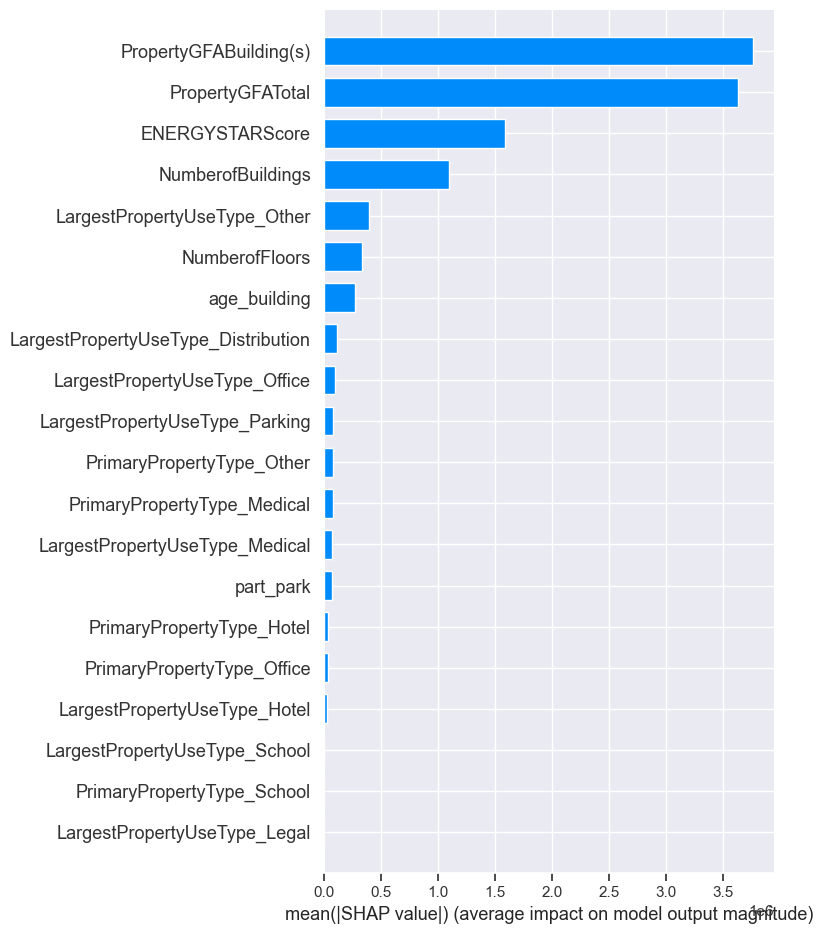

,col_name,feature_importance_vals
5,PropertyGFABuilding(s),3.759008e+06
6,PropertyGFATotal,3.627993e+06
0,ENERGYSTARScore,1.585816e+06
1,NumberofBuildings,1.097029e+06
19,LargestPropertyUseType_Other,3.892364e+05


In [51]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test_std)

shap.summary_plot(shap_values, X_test, plot_type="bar")

feature_names = X_train.columns


random_forest_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(random_forest_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head()